## Homework 3
### Programming Assignment 1
### 111 Computational Physics Lab  
  >Author: Yuan-Yen Peng 108000204  
  >Email: garyphys0915@gapp.nthu.edu.com  
  >Date: Nov. 11, 2022  
  >LICENCE: MIT

In [35]:
import numpy as np
import glob
from numba import jit, njit, prange, set_num_threads
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from nbody.particles import Particles
from nbody.simulation import NbodySimulation

In [36]:
problem_name = "NormalCloud"
Num = int(1e3)
tmax = 10
dt = 0.01
step = int(tmax / dt)
r_soft = 0.0001

radn = np.zeros((Num, 3))
for i in range(Num):
    mu, sigma = 0, 1 # mean = 0; variance = 1, i.e., standard deviation = sqrt(var) = 1
    radn[i, :] = np.random.normal(mu, sigma, 3)

In [37]:
set_num_threads(8)
@njit(parallel = True)
def generator(radn, N, positions, velocities, accelerations):
        for i in prange(N):
            positions[i, :] = radn[i]
            velocities[i, :] = radn[i]
            accelerations[i, :] = radn[i]
            
        return positions, velocities, accelerations

In [38]:
def initialRandomParticles(radn, N):
        """
        Initial particles

        """
        total_mass = 20
        particles = Particles(N = N)
        
        positions = particles.get_positions()
        velocities = particles.get_velocities()
        accelerations = particles.get_accelerations()
        masses = particles.get_masses() # ones array (size = N)
        mass = total_mass / particles.nparticles # single particel's mass
        
        particles.set_masses((masses * mass))
        particles.set_positions(generator(radn, N, positions, velocities, accelerations)[0])
        particles.set_velocities(generator(radn, N, positions, velocities, accelerations)[1])
        particles.set_accelerations(generator(radn, N, positions, velocities, accelerations)[2])

        return particles

solve with t = 0 ~ 10 with dt = 0.01 and r_soft = 0.01.

data_NormalCloud/data_NormalCloud_00000.txt


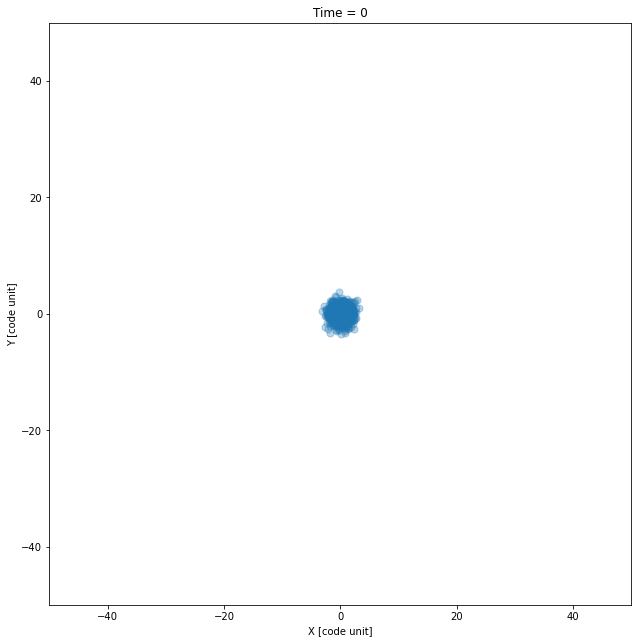

data_NormalCloud/data_NormalCloud_00200.txt


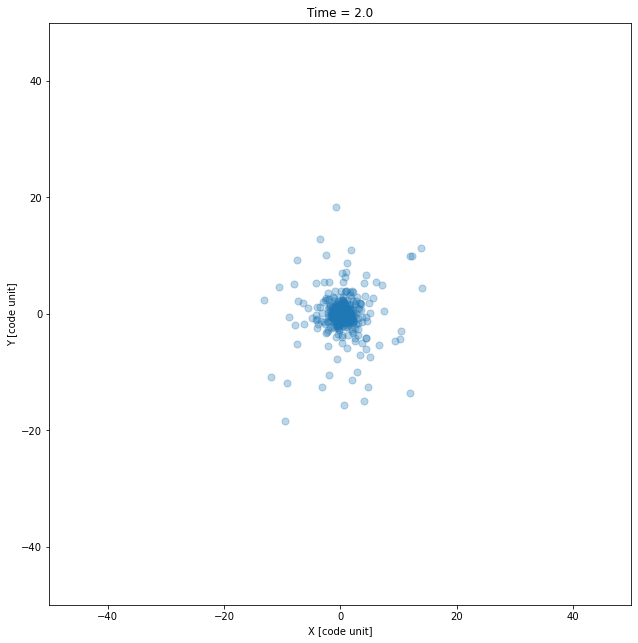

data_NormalCloud/data_NormalCloud_00400.txt


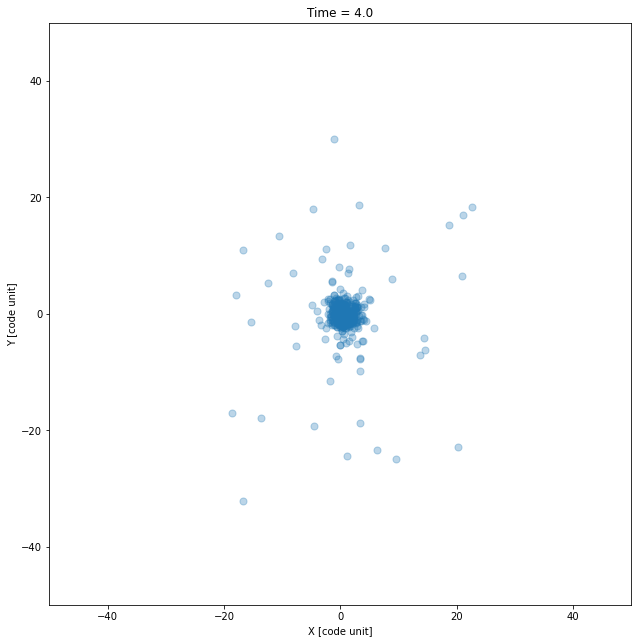

data_NormalCloud/data_NormalCloud_00600.txt


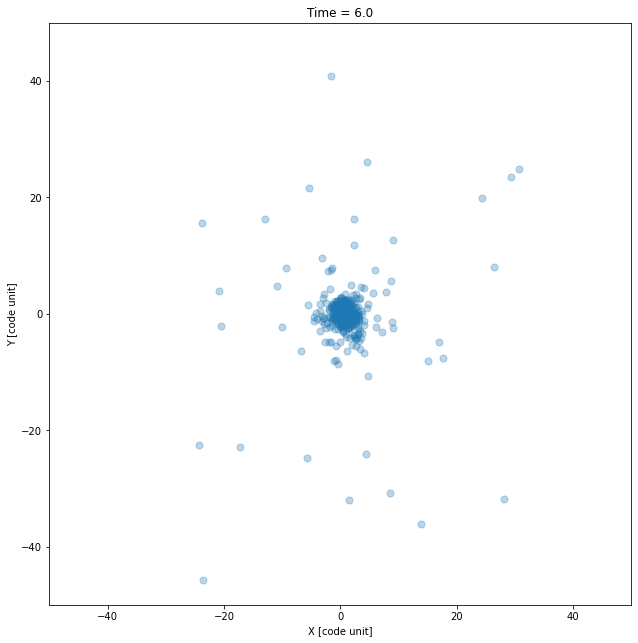

data_NormalCloud/data_NormalCloud_00800.txt


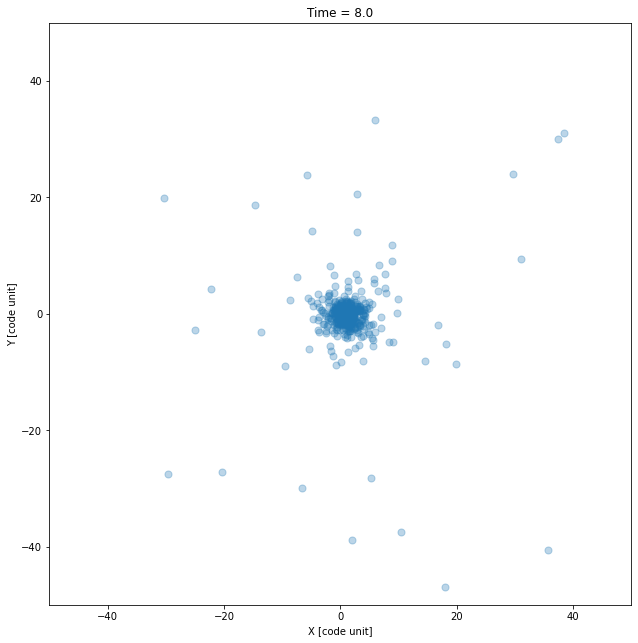

data_NormalCloud/data_NormalCloud_01000.txt


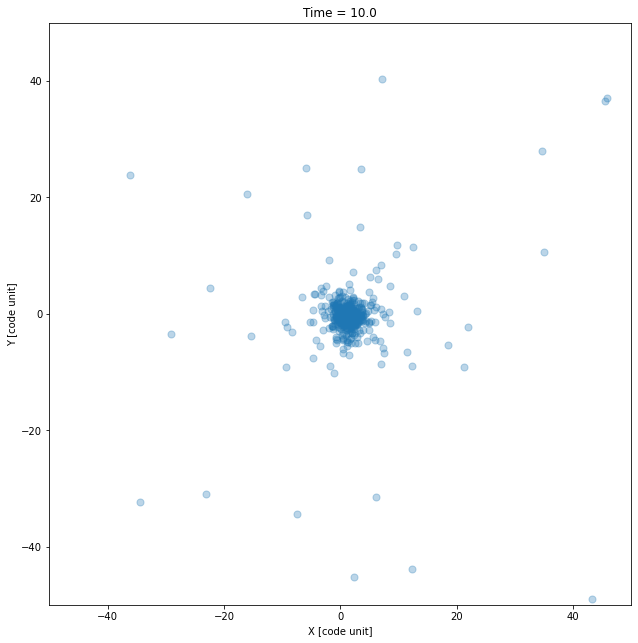

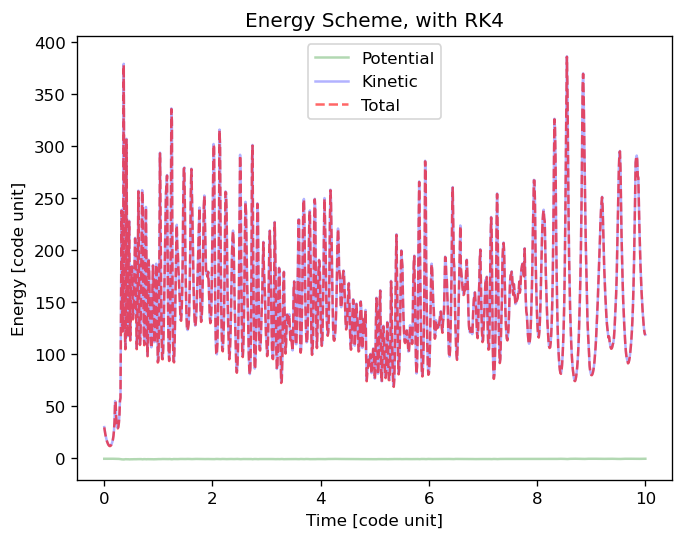

Time diff:  348.53948998451233
Done!


In [39]:
# Initial particles here.
method = "RK4"
particles = initialRandomParticles(radn, N = Num)
# Run the n-body simulations
sim = NbodySimulation(particles)
sim.setup(G=1,method=method,io_freq=200,io_title=problem_name,io_screen=True,visualized=False)
Energy_RK4 = sim.evolve(dt=dt,tmax=tmax)

data_NormalCloud/data_NormalCloud_00000.txt


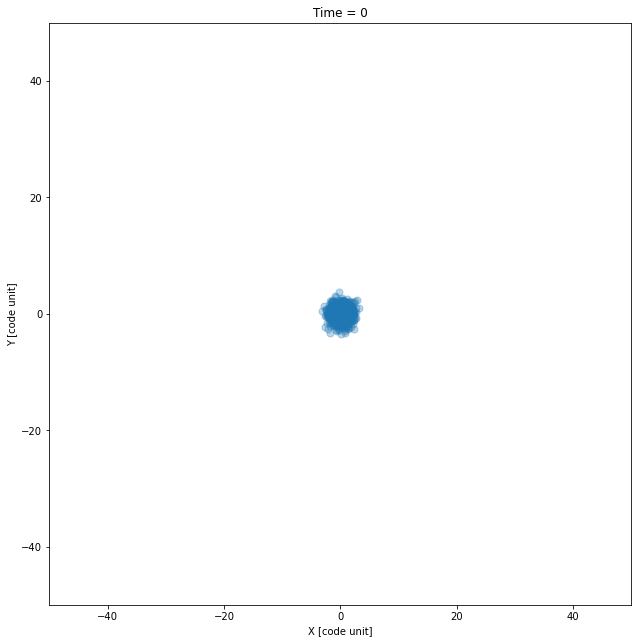

data_NormalCloud/data_NormalCloud_00200.txt


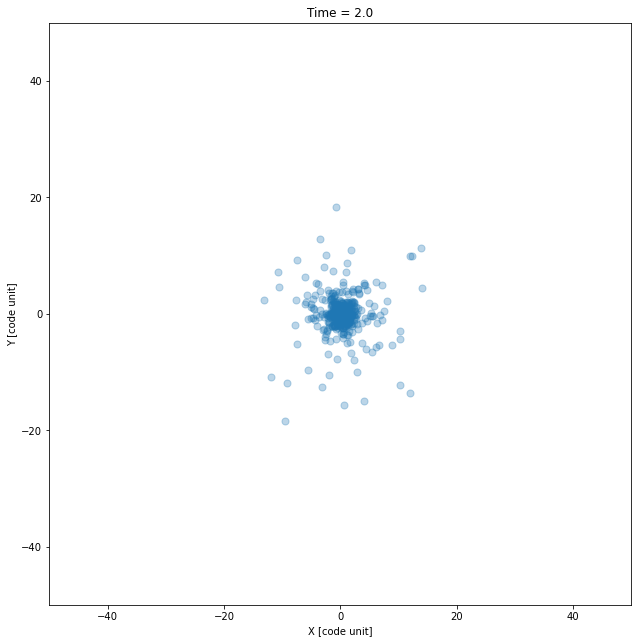

data_NormalCloud/data_NormalCloud_00400.txt


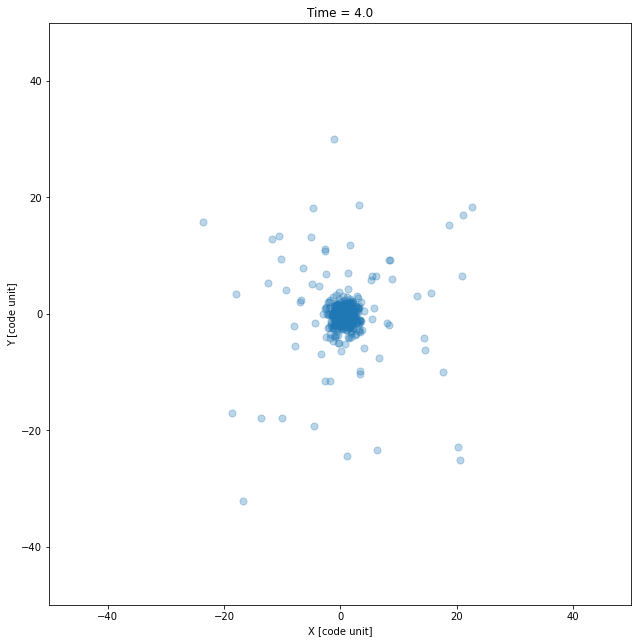

data_NormalCloud/data_NormalCloud_00600.txt


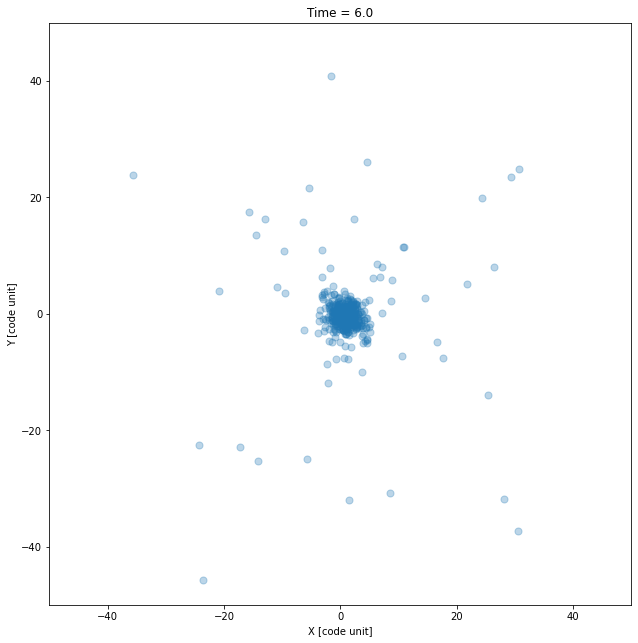

data_NormalCloud/data_NormalCloud_00800.txt


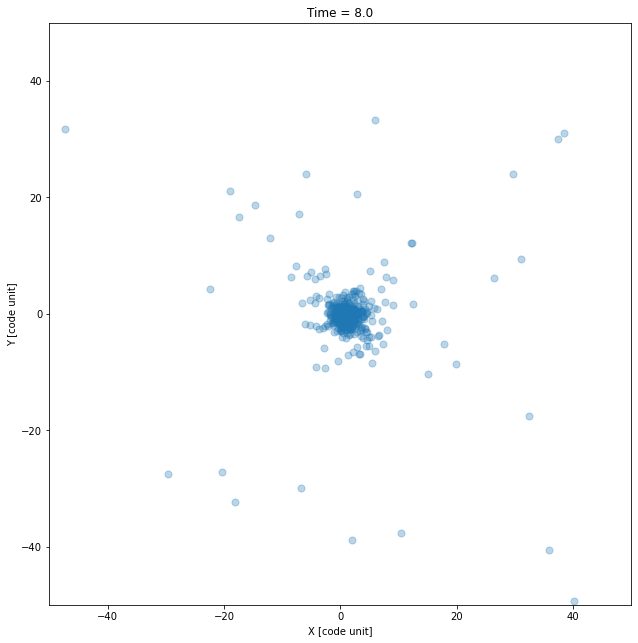

data_NormalCloud/data_NormalCloud_01000.txt


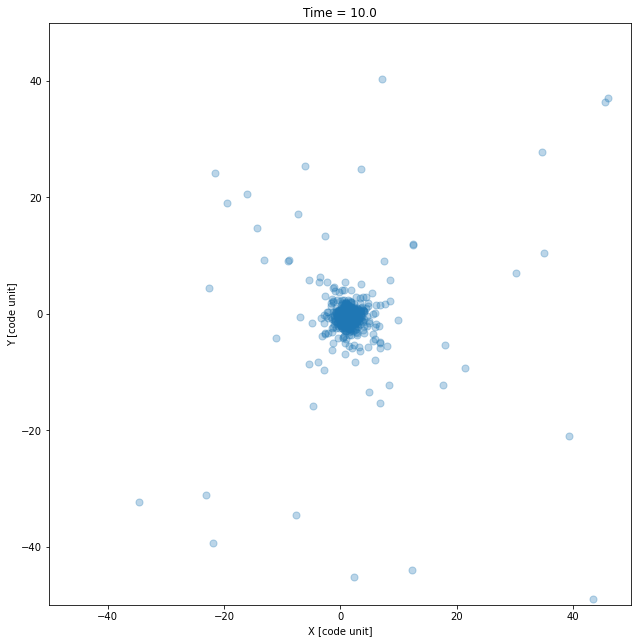

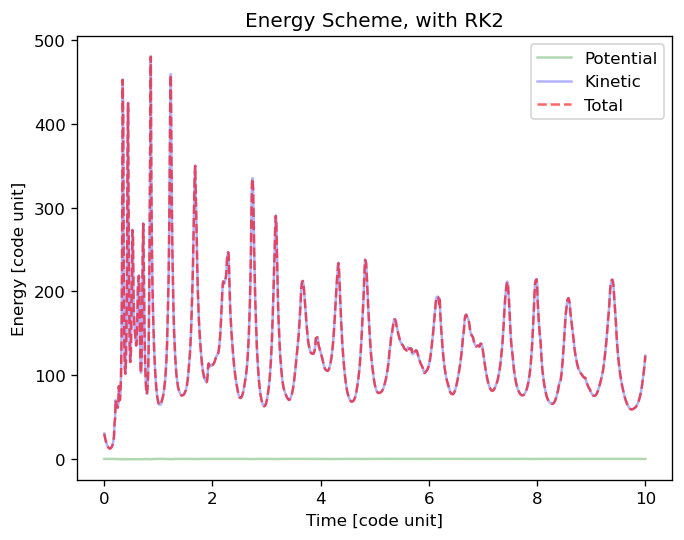

Time diff:  232.29304313659668
Done!


In [40]:
# Initial particles here.
method = "RK2"
particles = initialRandomParticles(radn, N = Num)
# Run the n-body simulations
sim = NbodySimulation(particles)
sim.setup(G=1,method=method,io_freq=200,io_title=problem_name,io_screen=True,visualized=False)
Energy_RK2 = sim.evolve(dt=dt,tmax=tmax)

data_NormalCloud/data_NormalCloud_00000.txt


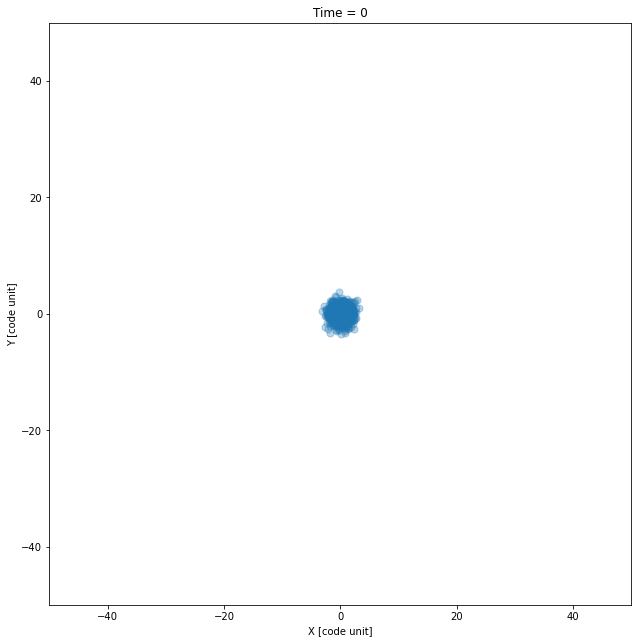

data_NormalCloud/data_NormalCloud_00200.txt


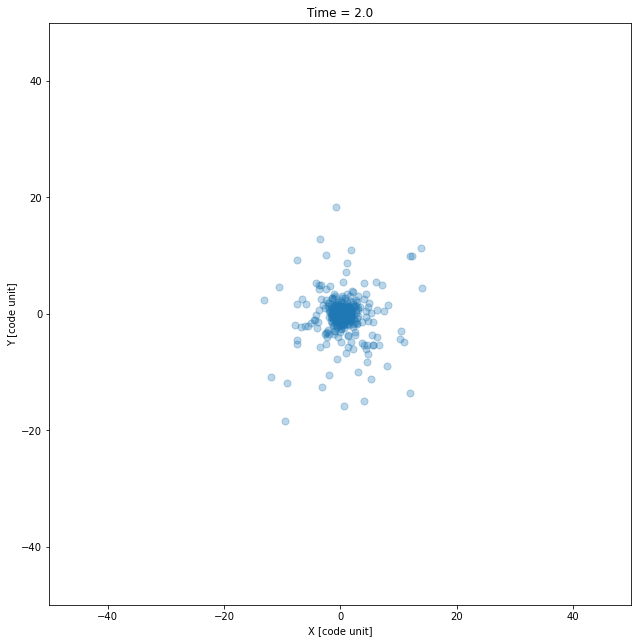

data_NormalCloud/data_NormalCloud_00400.txt


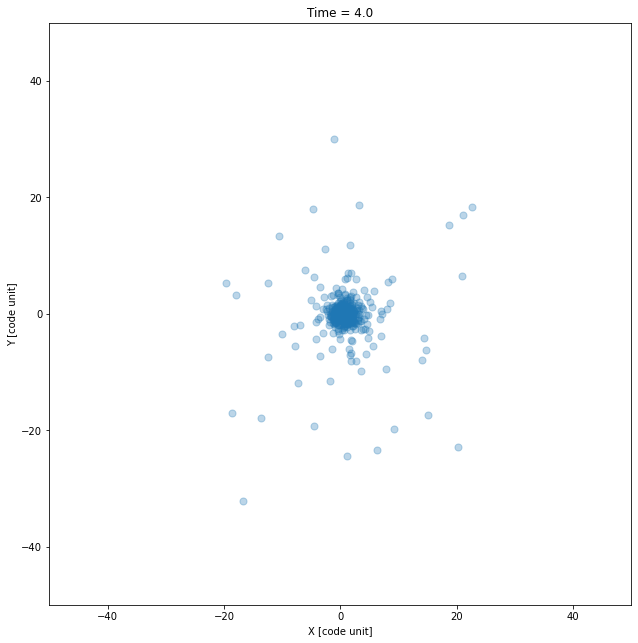

data_NormalCloud/data_NormalCloud_00600.txt


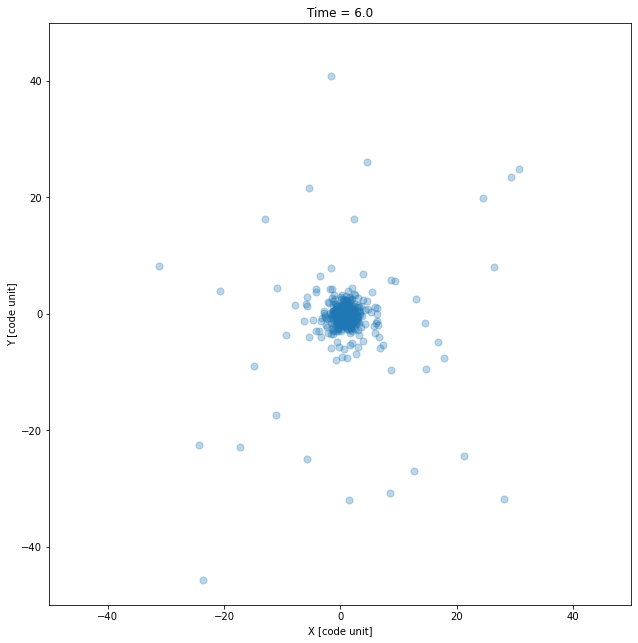

data_NormalCloud/data_NormalCloud_00800.txt


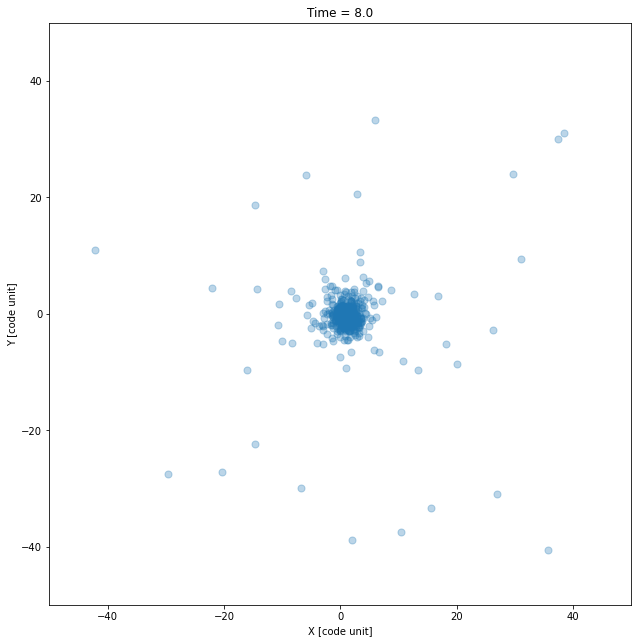

data_NormalCloud/data_NormalCloud_01000.txt


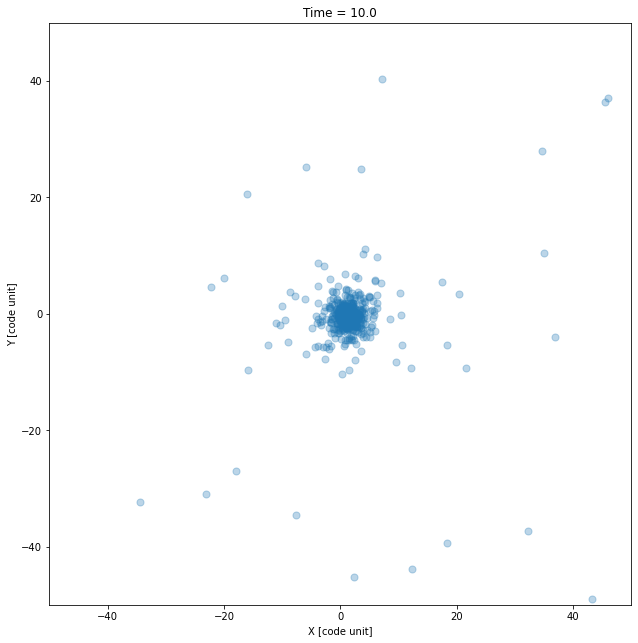

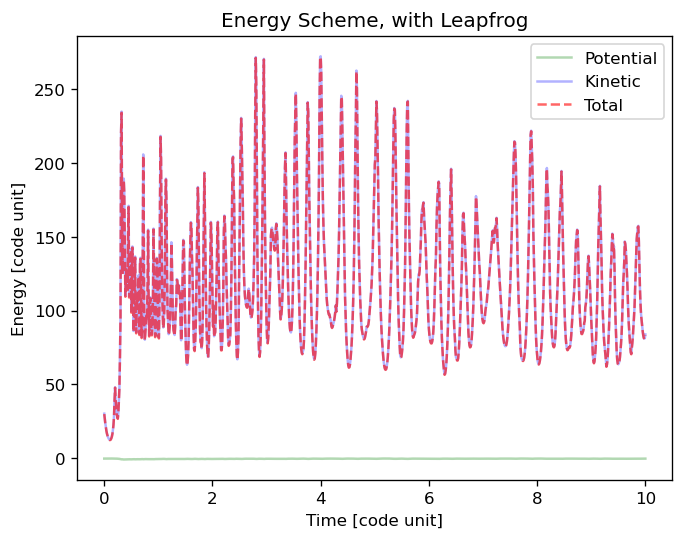

Time diff:  187.22133994102478
Done!


In [41]:
# Initial particles here.
method = "Leapfrog"
particles = initialRandomParticles(radn, N = Num)
# Run the n-body simulations
sim = NbodySimulation(particles)
sim.setup(G=1,method=method,io_freq=200,io_title=problem_name,io_screen=True,visualized=False)
Energy_LF = sim.evolve(dt=dt,tmax=tmax)

data_NormalCloud/data_NormalCloud_00000.txt


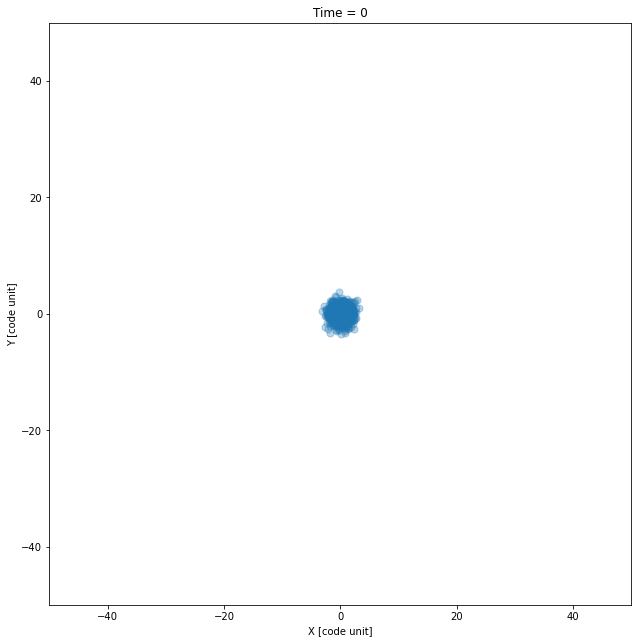

data_NormalCloud/data_NormalCloud_00200.txt


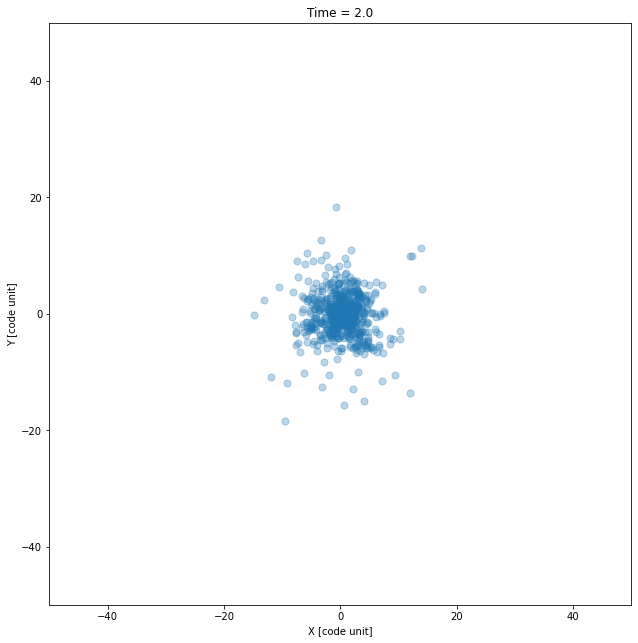

data_NormalCloud/data_NormalCloud_00400.txt


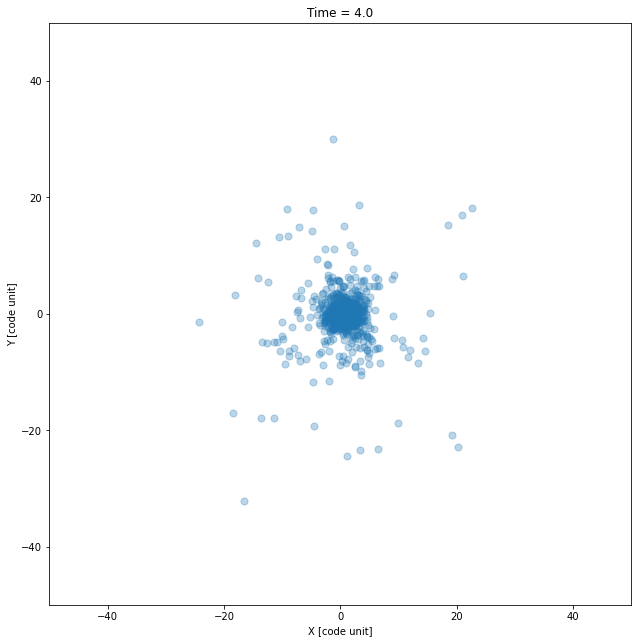

data_NormalCloud/data_NormalCloud_00600.txt


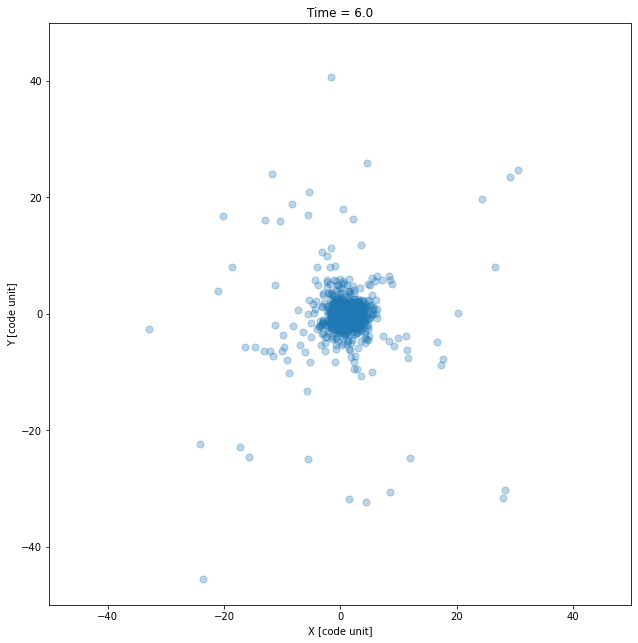

data_NormalCloud/data_NormalCloud_00800.txt


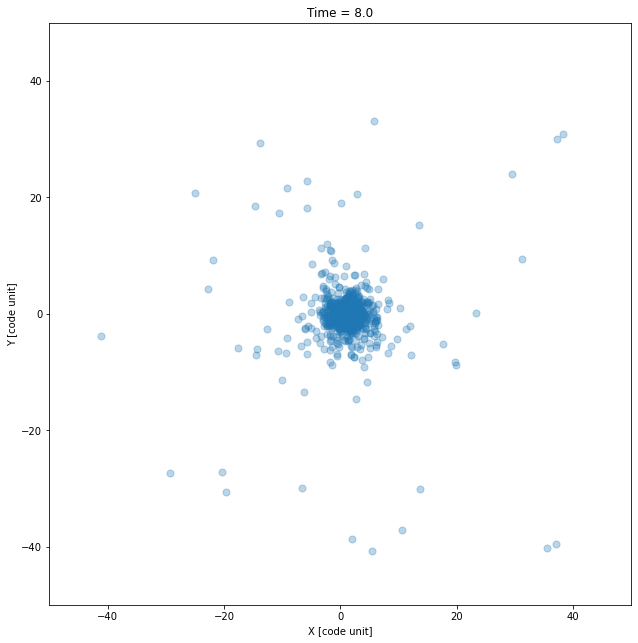

data_NormalCloud/data_NormalCloud_01000.txt


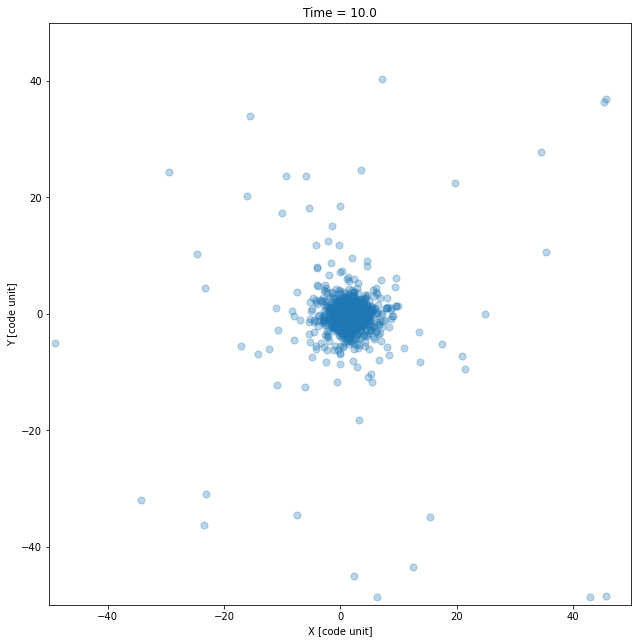

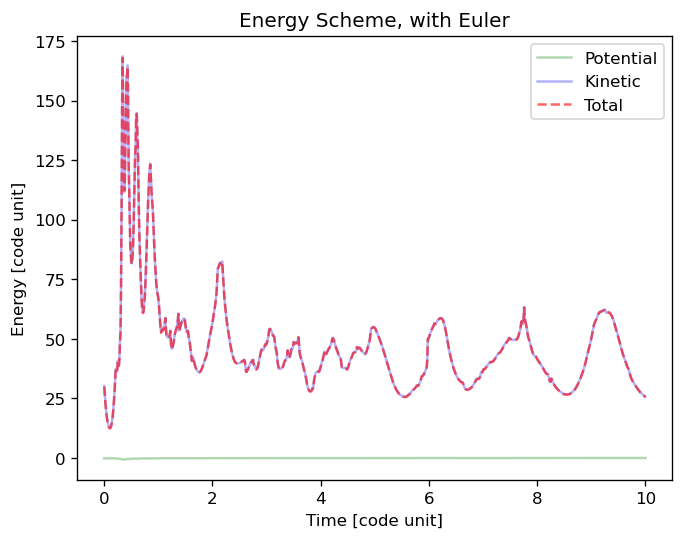

Time diff:  204.84048318862915
Done!


In [42]:
# Initial particles here.
method = "Euler"
particles = initialRandomParticles(radn, N = Num)
# Run the n-body simulations
sim = NbodySimulation(particles)
sim.setup(G=1,method=method,io_freq=200,io_title=problem_name,io_screen=True,visualized=False)
Energy_Euler = sim.evolve(dt=dt,tmax=tmax)

Average =  59.734637981953796
Accuracy (log) =  1.7762262360223338


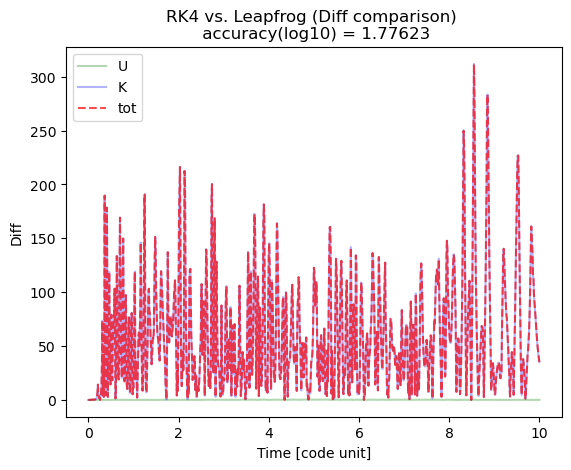

In [43]:
TT = len(Energy_RK4[0])
Time = np.linspace(0, tmax, len(Energy_RK4[0]))
Diff_tot = np.abs((Energy_RK4[0] + Energy_RK4[1]) - (Energy_LF[0] + Energy_LF[1]))
Diff = np.abs(np.array(Energy_RK4) - np.array(Energy_LF))
avg = np.average(Diff_tot)
accuracy = np.log10(avg)
print("Average = ", avg)
print("Accuracy (log) = ", accuracy)

plt.plot(Time, Diff[0], "g", alpha = .3, label = "U")
plt.plot(Time, Diff[1], "b", alpha = .3, label = "K")
plt.plot(Time, Diff_tot, "--r", alpha = .7, label = "tot")
plt.xlabel("Time [code unit]")
plt.ylabel("Diff")
plt.title(f"RK4 vs. Leapfrog (Diff comparison) \n accuracy(log10) = {np.round(accuracy, 5)}")
plt.legend()
plt.show()

Average =  61.861484166566925
Accuracy (log) =  1.7914203352859452


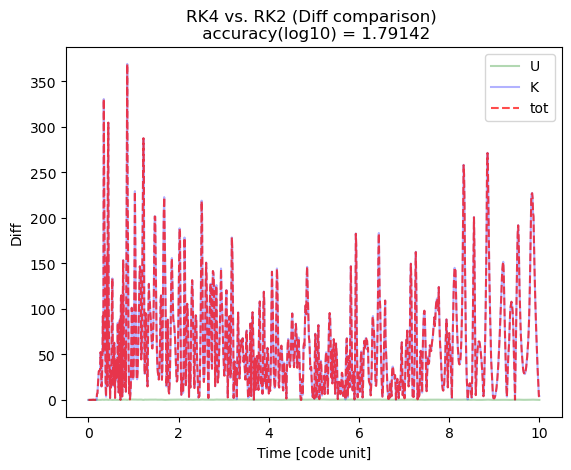

In [44]:
Energy_LF = Energy_RK2
TT = len(Energy_RK4[0])
Time = np.linspace(0, tmax, len(Energy_RK4[0]))
Diff_tot = np.abs((Energy_RK4[0] + Energy_RK4[1]) - (Energy_LF[0] + Energy_LF[1]))
Diff = np.abs(np.array(Energy_RK4) - np.array(Energy_LF))
avg = np.average(Diff_tot)
accuracy = np.log10(avg)
print("Average = ", avg)
print("Accuracy (log) = ", accuracy)

plt.plot(Time, Diff[0], "g", alpha = .3, label = "U")
plt.plot(Time, Diff[1], "b", alpha = .3, label = "K")
plt.plot(Time, Diff_tot, "--r", alpha = .7, label = "tot")
plt.xlabel("Time [code unit]")
plt.ylabel("Diff")
plt.title(f"RK4 vs. RK2 (Diff comparison) \n accuracy(log10) = {np.round(accuracy, 5)}")
plt.legend()
plt.show()

Average =  104.56997734955475
Accuracy (log) =  2.0194070139482663


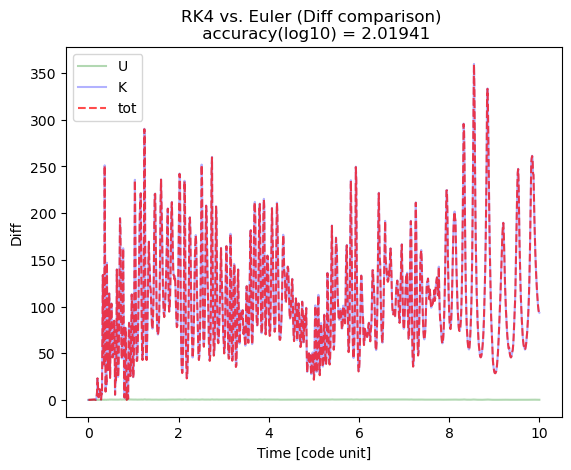

In [45]:
Energy_LF = Energy_Euler
TT = len(Energy_RK4[0])
Time = np.linspace(0, tmax, len(Energy_RK4[0]))
Diff_tot = np.abs((Energy_RK4[0] + Energy_RK4[1]) - (Energy_LF[0] + Energy_LF[1]))
Diff = np.abs(np.array(Energy_RK4) - np.array(Energy_LF))
avg = np.average(Diff_tot)
accuracy = np.log10(avg)
print("Average = ", avg)
print("Accuracy (log) = ", accuracy)

plt.plot(Time, Diff[0], "g", alpha = .3, label = "U")
plt.plot(Time, Diff[1], "b", alpha = .3, label = "K")
plt.plot(Time, Diff_tot, "--r", alpha = .7, label = "tot")
plt.xlabel("Time [code unit]")
plt.ylabel("Diff")
plt.title(f"RK4 vs. Euler (Diff comparison) \n accuracy(log10) = {np.round(accuracy, 5)}")
plt.legend()
plt.show()